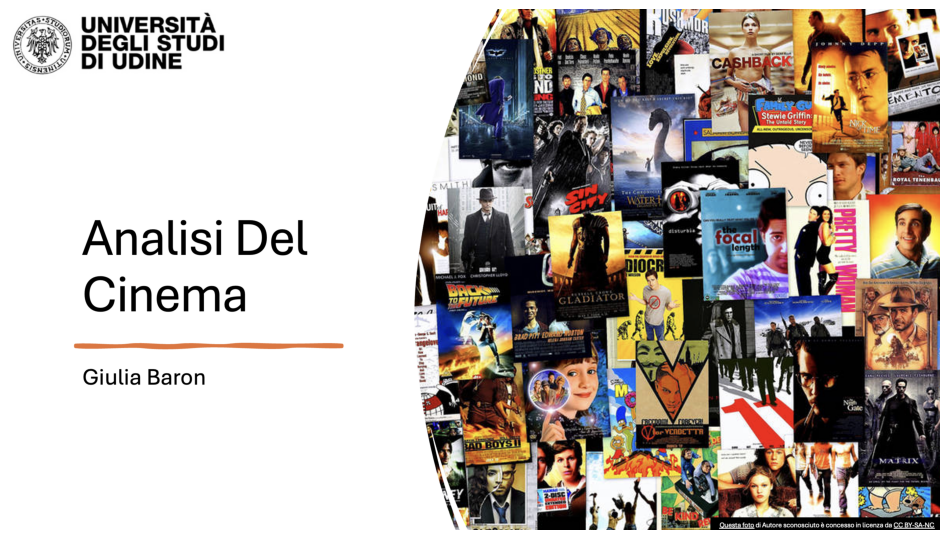

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("prima_slide.png")
fig, ax = plt.subplots(figsize=(12, 8))  
ax.imshow(img)
ax.axis("off")
plt.show()

# Motivazioni

- Impatto culturale 🏛️
  
- Esplorare diversi aspetti del mondo del cinema 🎥 
  
- Analisi dei dati e prospettive future sull'industria cinematografica 📊

# Obbiettivi e domande
- Evoluzione del cinema nel tempo 📈
  
- Paesi che producono più film 🌎
  
- Il voto è un buon indicatore per un film di successo al botteghino ? 💯
  
- Il giorno della settimana e il mese d'uscita coincidono con un miglior guadagno ? 💸

# Dataset
Il [DataSet](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies) che è stato utilizzato è preso da **Kaggle** e include circa 1 milione di film. Fornisce informazioni sui film. Inoltre viene aggiornato ogni giorno usando la piattaforma [The Movie Database](https://www.themoviedb.org).
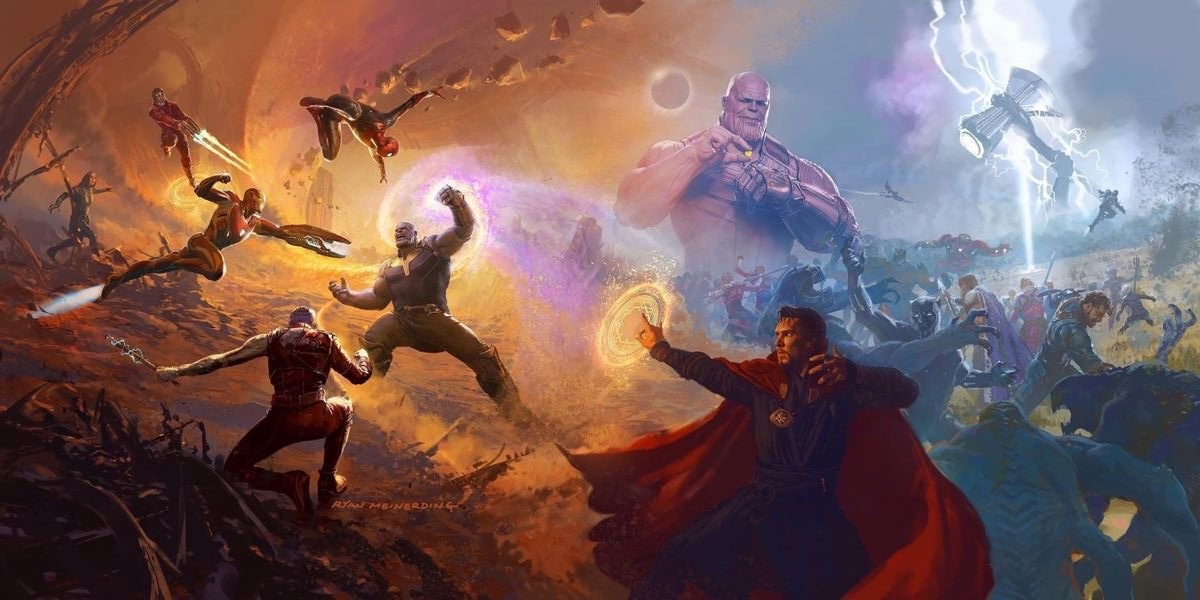




# Comprensione dei dati

In [1]:
# importo librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import scipy as sp

In [2]:
# prendo i dati contenuti nel file csv 
df = pd.read_csv('/Users/giuliabaron/Desktop/Universita/DataScience/demo/TMDB_movie_dataset_v11.csv')
print (df.head(5))

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

In [3]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Rimozione dati mancanti

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171700 entries, 0 to 1171699
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1171700 non-null  int64  
 1   title                 1171687 non-null  object 
 2   vote_average          1171700 non-null  float64
 3   vote_count            1171700 non-null  int64  
 4   status                1171700 non-null  object 
 5   release_date          969690 non-null   object 
 6   revenue               1171700 non-null  int64  
 7   runtime               1171700 non-null  int64  
 8   adult                 1171700 non-null  bool   
 9   backdrop_path         308605 non-null   object 
 10  budget                1171700 non-null  int64  
 11  homepage              123309 non-null   object 
 12  imdb_id               611016 non-null   object 
 13  original_language     1171700 non-null  object 
 14  original_title        1171687 non-

In [5]:
# osservazioni senza titolo
df[df['title'].isna()].shape[0]

13

In [6]:
# rimozione delle osservazioni senza titolo
df.drop(df[df['title'].isna()].index, inplace=True)

In [7]:
# controllo che sia 0
df[df['title'].isna()].shape[0]

0

## Rimozione dati non pertinenti

In [8]:
# rimuovo i film per adulti 
df.groupby('adult', as_index = False).size().sort_values('size', ascending=False)

adult     size
0  False  1060209
1   True   111478

In [9]:
df = df[df['adult']==False]

In [10]:
df.groupby('adult', as_index = False).size().sort_values('size', ascending=False)

adult     size
0  False  1060209

## Status

In [11]:
df.groupby('status', as_index=False).size()

status     size
0         Canceled      299
1    In Production    11426
2          Planned     7298
3  Post Production     8612
4         Released  1032190
5          Rumored      384

In [12]:
# tengo solo la categoria "Released"
df = df[df['status'] == 'Released']

In [13]:
df.groupby('status', as_index=False).size()

status     size
0  Released  1032190

## Runtime

In [14]:
df['runtime'].describe()

count    1.032190e+06
mean     4.309342e+01
std      5.824639e+01
min     -2.800000e+01
25%      0.000000e+00
50%      1.900000e+01
75%      8.500000e+01
max      1.440000e+04
Name: runtime, dtype: float64

Analizzando gli indici di posizione si nota che:
- il valore **minimo** è negativo
- la **metà** dei valori ha una durata di 19 minuti
- il valore **massimo** è di 14400 minuti


In [15]:
# trovo il nome del film con lunghezza negativa
df.loc[df['runtime'] < 0,'title']

648901    An Eye For An Eye
Name: title, dtype: object

In [16]:
df[df['title']=='An Eye For An Eye']

id              title  vote_average  vote_count    status  \
384177  1163066  An Eye For An Eye           0.0           0  Released   
648901  1238160  An Eye For An Eye           0.0           0  Released   
689996  1283974  An Eye For An Eye           0.0           0  Released   
736398  1267932  An Eye For An Eye           0.0           0  Released   

       release_date  revenue  runtime  adult  \
384177          NaN        0       84  False   
648901          NaN        0      -28  False   
689996   2023-06-01        0        0  False   
736398   2022-02-09        0        0  False   

                           backdrop_path  ...     original_title  \
384177                               NaN  ...  An Eye For An Eye   
648901                               NaN  ...  An Eye For An Eye   
689996                               NaN  ...  An Eye For An Eye   
736398  /eD0xqCgCCz1Df16WQQbPcrXDg79.jpg  ...  An Eye For An Eye   

                                                 overview popularity  \
384177  In this twist of fate story, set in the street...        0.6   
648901  Lucy has a promising career ahead of her. Lucy...        0.0   
689996                                      A short film.        0.6   
736398                                                NaN        0.6   

                             poster_path                     tagline genres  \
384177                               NaN                         NaN    NaN   
648901                               NaN  We are who we choose to be    NaN   
689996                               NaN                         NaN    NaN   
736398  /q5U2QgV8fNysyBpRoZbSGLSufZL.jpg                         NaN    NaN   

        production_companies production_countries spoken_languages keywords  
384177                   NaN                  NaN              NaN      NaN  
648901                   NaN                  NaN              NaN      NaN  
689996                   NaN                  NaN       Portuguese      NaN  
736398                   NaN                  NaN          English      NaN  

[4 rows x 24 columns]

Cercando il film con id = 1238160 sul sito di riferimento del dataset [The Movie Database](https://www.themoviedb.org), si vede che il film dura 29 minuti. Decido di tenere solo i film di una durata compresa tra i 60 e i 240 minuti, in quanto il [lungometraggio](https://it.wikipedia.org/wiki/Lungometraggio) è il più diffuso.

In [17]:
df = df[(df['runtime'] >= 60) & (df['runtime'] <= 240)]

In [18]:
df['runtime'].describe()

count    372891.000000
mean         95.816702
std          25.591561
min          60.000000
25%          80.000000
50%          90.000000
75%         105.000000
max         240.000000
Name: runtime, dtype: float64

## Vote average

In [19]:
df['vote_average'].describe

<bound method NDFrame.describe of 0          8.364
1          8.417
2          8.512
3          7.573
4          7.710
           ...  
1171688    0.000
1171692    0.000
1171693    0.000
1171694    0.000
1171697    0.000
Name: vote_average, Length: 372891, dtype: float64>

In [20]:
# elimino i valori di "vote_average" che sono 0 o NaN
df = df[df["vote_average"] > 0]

In [21]:
df['vote_average'].describe

<bound method NDFrame.describe of 0          8.364
1          8.417
2          8.512
3          7.573
4          7.710
           ...  
1158428    9.000
1163798    9.000
1165784    4.000
1167266    8.000
1169408    1.000
Name: vote_average, Length: 207083, dtype: float64>

## Release date

In [22]:
# tengo solo i film usciti dal 01/01/1900 e 31/12/2024
df = df[(df['release_date'] >= '1900-01-01') & (df['release_date']<= '2024-12-31')]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205957 entries, 0 to 1169408
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    205957 non-null  int64  
 1   title                 205957 non-null  object 
 2   vote_average          205957 non-null  float64
 3   vote_count            205957 non-null  int64  
 4   status                205957 non-null  object 
 5   release_date          205957 non-null  object 
 6   revenue               205957 non-null  int64  
 7   runtime               205957 non-null  int64  
 8   adult                 205957 non-null  bool   
 9   backdrop_path         129695 non-null  object 
 10  budget                205957 non-null  int64  
 11  homepage              33366 non-null   object 
 12  imdb_id               193417 non-null  object 
 13  original_language     205957 non-null  object 
 14  original_title        205957 non-null  object 
 15  over

In [24]:
# cambiare il valore di "release_date" da oggetto a data
df['release_date'] = pd.to_datetime(df['release_date'])

In [25]:
df['release_date'].describe

<bound method NDFrame.describe of 0         2010-07-15
1         2014-11-05
2         2008-07-16
3         2009-12-15
4         2012-04-25
             ...    
1158428   2021-10-22
1163798   1998-06-10
1165784   2020-10-06
1167266   2020-02-16
1169408   2007-05-05
Name: release_date, Length: 205957, dtype: datetime64[ns]>

# Nuovo dataset pulito

In [26]:
df_2 = df.copy()

In [27]:
df_2.to_csv("TMDB_ripulito.csv", index=False)

# Grafici

- Evoluzione del cinema nel tempo 📈

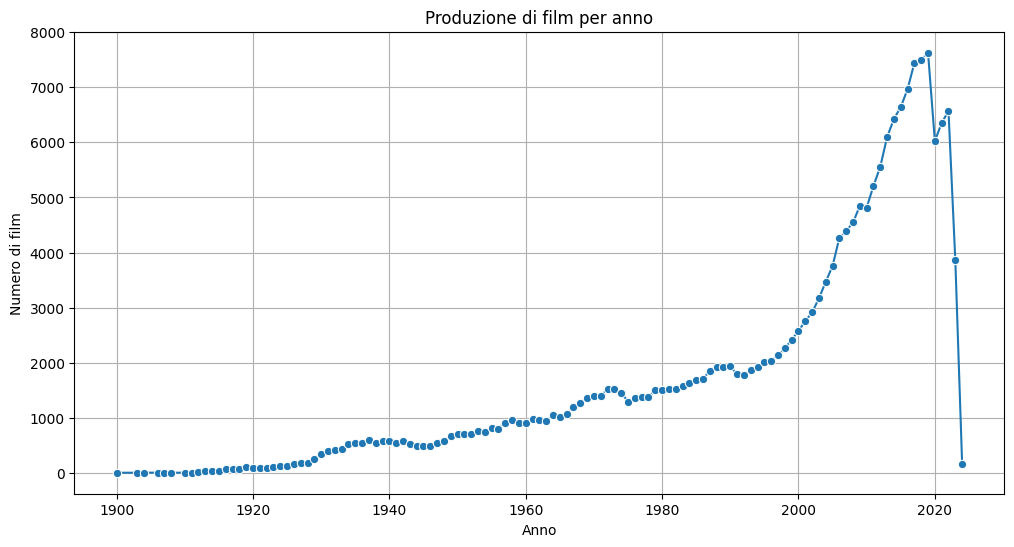

In [28]:
# mi assicuro che sia una data e non oggetto
df_2['release_date'] = pd.to_datetime(df_2['release_date'])

#colonna 'year' da 'release_date' 
df_2['year'] = df_2['release_date'].dt.year

#ragggruppo i dati della colonna 'year' e conto il numero di film all'anno
df_group = df_2.groupby('year').size().reset_index(name= 'Num_film')

plt.figure(figsize=(12, 6))
sns.lineplot( data=df_group, x='year', y='Num_film', marker='o' )
plt.title('Produzione di film per anno')
plt.xlabel('Anno')
plt.ylabel('Numero di film')
plt.grid(True)
plt.show()

- Paesi che producono più film 🌎

In [29]:
# Conto il numero di film per ogni paese
conta_paesi = df_2['production_countries'].value_counts()

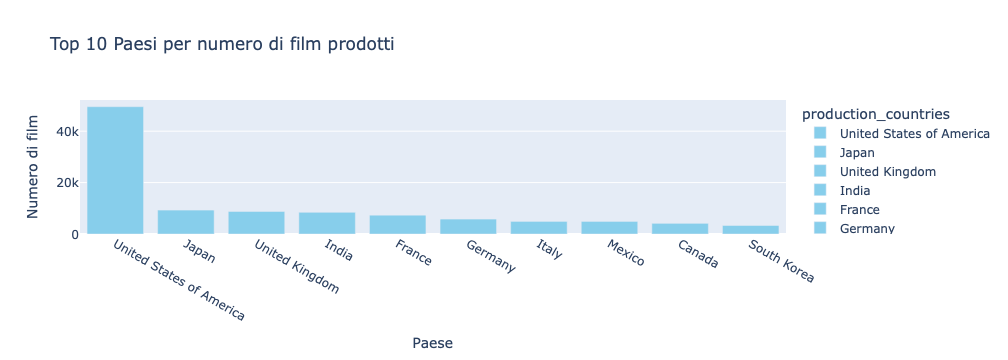

In [30]:
# prendo i primi 10 che ho contato
top_paesi = conta_paesi.head(10)

# Creo il grafico a barre interattivo
fig = px.bar(top_paesi, 
             x=top_paesi.index, 
             y=top_paesi.values, 
             labels={'x': 'Paese', 'y': 'Numero di film'}, 
             title='Top 10 Paesi per numero di film prodotti',
             color=top_paesi.index,                            #  parametro color
             color_discrete_sequence=['skyblue'])              # colore personalizzato

fig.update_layout(
    xaxis_title="Paese")

fig.update_traces(hovertemplate=' %{y} Film')             # update_trace() metodo di plotly

fig.show()

- Il voto è un buon indicatore per un film di successo al botteghino ? 💯

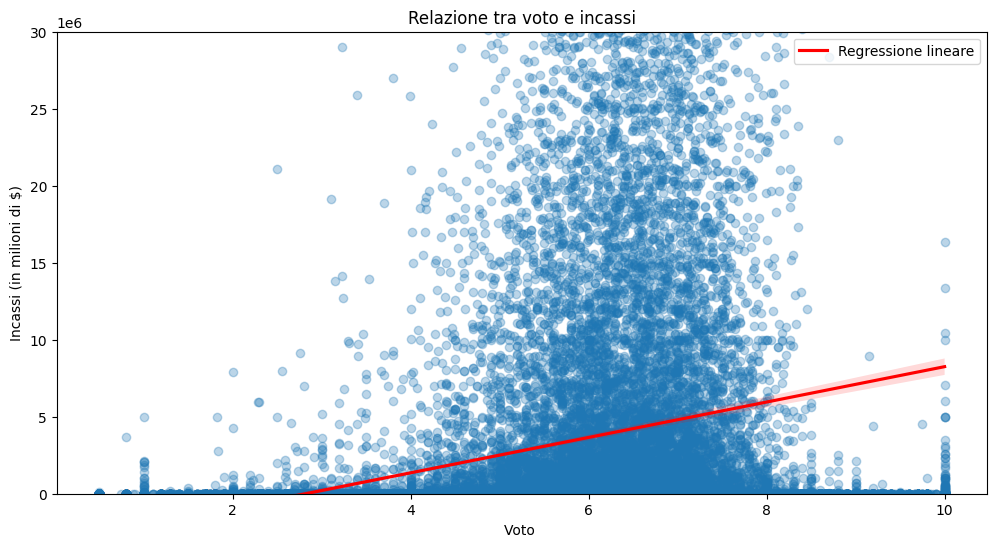

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.regplot(x="vote_average", y="revenue", data=df_2, 
                 scatter_kws={"alpha": 0.3},                                 # trasparenza punti     
                 line_kws={"color": "red", "label": "Regressione lineare"})  # Linea di regressione
                 
       
plt.xlabel("Voto ")
plt.ylabel("Incassi (in milioni di $)")
plt.title("Relazione tra voto e incassi")
plt.ylim([0,30000000])

# Notazione scientifica per asse Y (10^6)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.legend(loc="upper right")

plt.show()

In [32]:
import scipy.stats as sp

def stampa_coeff_corr(a, b):
    S = '{}: {:.3f} (p={:.2e})\n'

    # Calcolo e stampo la correlazione di Pearson
    corr_pearson = sp.pearsonr(a, b)
    print(S.format('Pearson', corr_pearson[0], corr_pearson[1]))

    # Calcolo e stampo la correlazione di Spearman
    corr_spearman = sp.spearmanr(a, b)
    print(S.format('Spearman', corr_spearman[0], corr_spearman[1]))

    # Calcolo e stampo la correlazione di Kendall
    corr_kendall = sp.kendalltau(a, b)
    print(S.format('Kendall', corr_kendall[0], corr_kendall[1]))

# Eseguo la funzione usando 'revenue' e 'vote_average' 
stampa_coeff_corr(df_2['revenue'], df_2['vote_average'])

Pearson: 0.052 (p=6.06e-123)

Spearman: 0.102 (p=0.00e+00)

Kendall: 0.083 (p=0.00e+00)



In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df_2[["vote_average"]], df_2["revenue"])
r_squared = reg.score(df_2[["vote_average"]], df_2["revenue"])

print(f"R²: {r_squared}")

R²: 0.00269625644301974


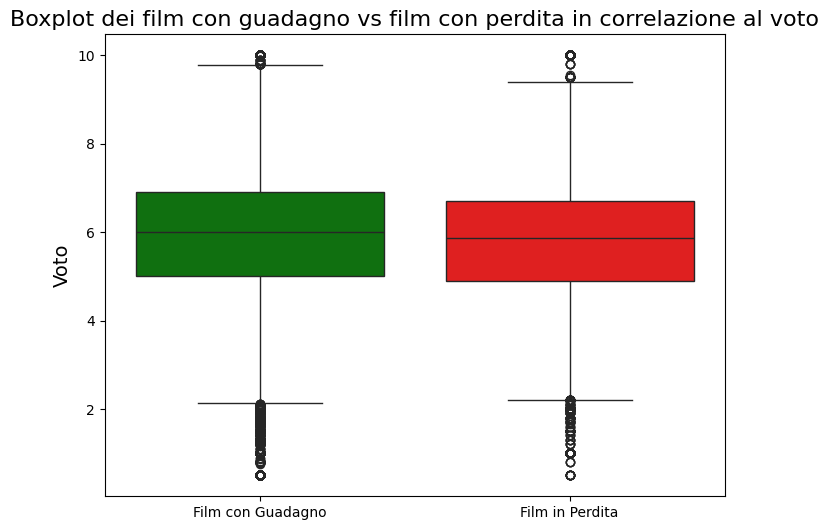

In [36]:
# Colonna "loss" per calcolare le perdite
df_2["loss"] = df_2["budget"] - df_2["revenue"]

# Creo "flop" per vedere se il film ha perso soldi 
df_2["flop"] = df_2["loss"] > 0

# Filtra i valori di "vote_average" che sono 0 o NaN
df_filtrato = df_2[df_2["vote_average"] > 0]

# Boxplot con mappatura di true e false
plt.figure(figsize=(8, 6))  

# Crea il boxplot
ax = sns.boxplot(
    x=df_filtrato["flop"].map({True: "Film in Perdita", False: "Film con Guadagno"}), 
    y=df_filtrato["vote_average"], 
    hue=df_filtrato["flop"],                     #hue per il colore
    palette={True: "red", False: "green"},       # Colori per flop
    showmeans=False,                            # Rimuove la visualizzazione della media
    legend=False                                  
)

plt.title("Boxplot dei film con guadagno vs film con perdita in correlazione al voto", fontsize=16)
plt.ylabel("Voto", fontsize=14)
plt.xlabel("", fontsize=14)

plt.show()

In [37]:
df_2["loss"] = df_2["budget"] - df_2["revenue"]
df_2["flop"] = df_2["loss"] > 0

median_guadagno = df_2[df_2["flop"] == False]["vote_average"].median()

median_perdita = df_2[df_2["flop"] == True]["vote_average"].median()

print("Mediana dei film con guadagno:", median_guadagno)
print("Mediana dei film con perdita:", median_perdita)

Mediana dei film con guadagno: 6.0
Mediana dei film con perdita: 5.875


- Il giorno della settimana e il mese d'uscita coincidono con un miglior guadagno ? 💸

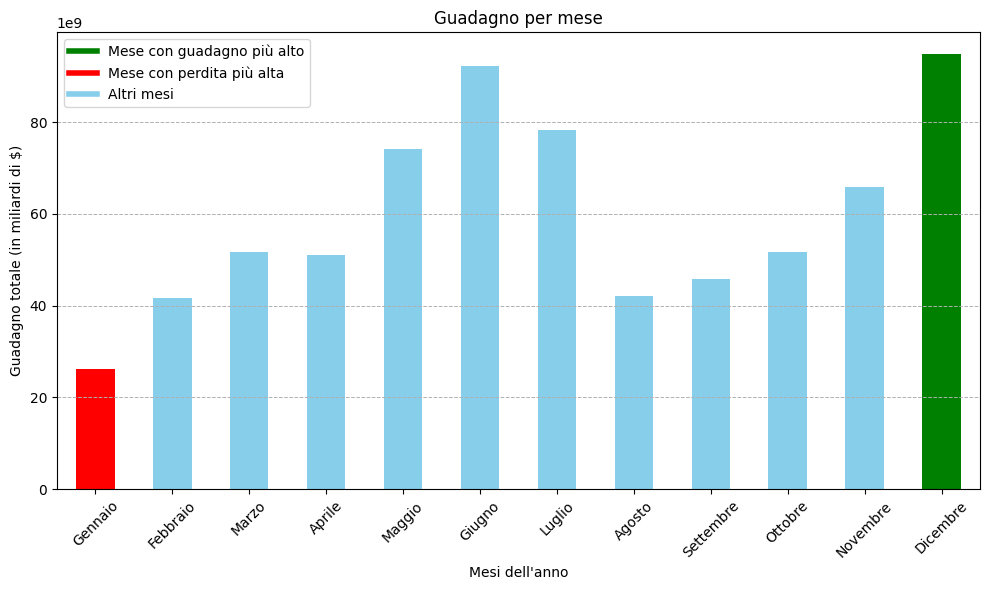

In [38]:
import matplotlib.lines as mlines

# Estraggo il mese da 'release_date'
df_2['month'] = df_2['release_date'].dt.month_name(locale = 'it_IT')

# Raggruppo ogni mese e sommo i valori di 'revenue'
mesi_guadagno = df_2.groupby('month')['revenue'].sum().reindex([
    'Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 
    'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'])

# Trovo il mese con più guadagni e quello con meno guadagni
miglior_mese = mesi_guadagno.idxmax()
peggior_mese = mesi_guadagno.idxmin()

# Imposto i colori
colori = ['green' if mese == miglior_mese else 'red' if mese == peggior_mese else 'skyblue' for mese in mesi_guadagno.index]

#grafico 
plt.figure(figsize=(10, 6))
barre = mesi_guadagno.plot(kind='bar', color=colori)

# etichette
plt.title('Guadagno per mese')
plt.xlabel("Mesi dell'anno")
plt.ylabel('Guadagno totale (in miliardi di $)')

# Notazione scientifica per asse Y (10^9)
plt.ticklabel_format(axis='y', style='sci', scilimits=(9,9))

# Griglia orizzontale
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Personalizzo la leggenda
verde = mlines.Line2D([], [], color='green', lw=4, label='Mese con guadagno più alto')  #Line2D() metodo di matplotlib
rosso = mlines.Line2D([], [], color='red', lw=4, label='Mese con perdita più alta')
altro = mlines.Line2D([], [], color='skyblue', lw=4, label='Altri mesi')

plt.legend(handles=[verde, rosso, altro], loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

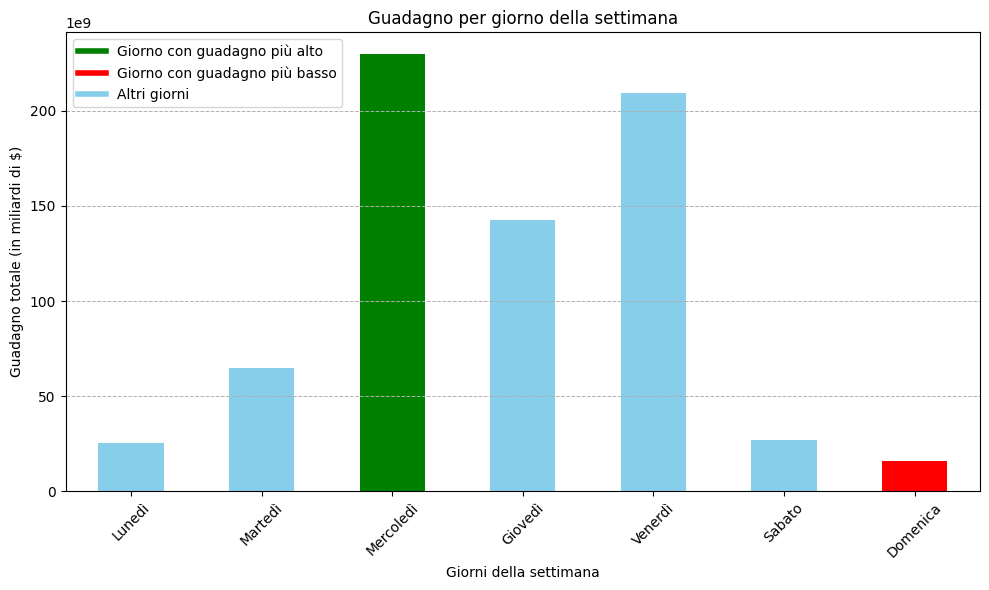

In [39]:
# Converting 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Estraggo il giorno della settimana da 'release_date' mantenendo i nomi in italiano
df['weekday'] = df['release_date'].dt.day_name(locale='it_IT')

# Raggruppo per giorno della settimana e sommo i guadagni
giorni_guadagno = df.groupby('weekday')['revenue'].sum().reindex([
    'Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'
]).fillna(0)  # Evita errori se qualche giorno non ha dati

# Trovo il giorno con più guadagni e quello con meno guadagni
miglior_giorno = giorni_guadagno.idxmax()
peggior_giorno = giorni_guadagno.idxmin()

# Imposto i colori
colori = ['green' if giorno == miglior_giorno else 'red' if giorno == peggior_giorno else 'skyblue' for giorno in giorni_guadagno.index]

# Grafico
plt.figure(figsize=(10, 6))
barre = giorni_guadagno.plot(kind='bar', color=colori)

# Etichette
plt.title('Guadagno per giorno della settimana')
plt.xlabel('Giorni della settimana')
plt.ylabel('Guadagno totale (in miliardi di $)')

# Notazione scientifica per asse Y (10^9)
plt.ticklabel_format(axis='y', style='sci', scilimits=(9,9))

# Griglia orizzontale
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Personalizzo la leggenda
verde = mlines.Line2D([], [], color='green', lw=4, label='Giorno con guadagno più alto')
rosso = mlines.Line2D([], [], color='red', lw=4, label='Giorno con guadagno più basso')
altro = mlines.Line2D([], [], color='skyblue', lw=4, label='Altri giorni')

plt.legend(handles=[verde, rosso, altro], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusioni

✅ Crescita costante nella produzione di film, con incremento significativo dagli anni 80 in poi. Forte calo dal 2020 causa       pandemia di COVID-19, scioperi e piattaforme di streamming

✅ Predominanza degli Stati Uniti e forte divario con gli altri paesi. Capacità produttiva non uniforme a livello mondiale

✅ Il voto di un film ha un impatto trascurabile sugli incassi. 

✅ Importantza delle stagioni e festività negli incassi di un film. Le abitudini quotidiane e promozioni influenzano il           comportamneto del pubblico


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("ulyima_slide.png")
fig, ax = plt.subplots(figsize=(12, 8))  # Cambia i valori per ingrandire
ax.imshow(img)
ax.axis("off")
plt.show()

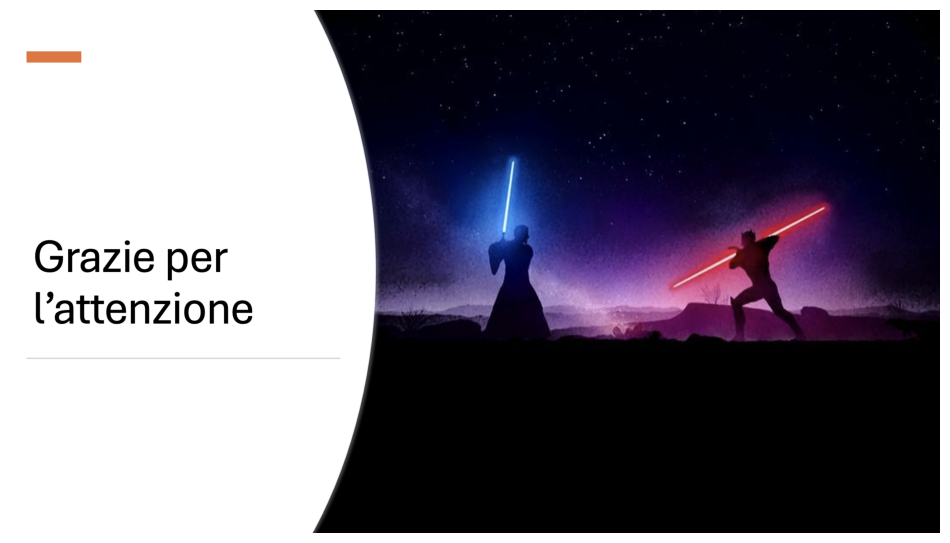

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("ultima_slide.png")
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)
ax.axis("off")
plt.show()